In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.io import savemat    
from pypoman.projection import project_polytope

# Visual check fof feasibility

In [23]:
def calculate_u_l(p_min, p_max, e_min, e_max, del_t, t_steps):
    u = [0]
    l = [0]
    for n in range(1, t_steps+1):
        u.append(min(n*del_t*p_max, e_max-(t_steps-n)*del_t*p_min))
        l.append(max(n*del_t*p_min, e_min-(t_steps-n)*del_t*p_max))
    return u, l

def generate_combinations_matrix(n):
    matrix_total = []
    for i in range(1, n+1):
        combinations_list = list(combinations(range(n), i))
        matrix = np.zeros((len(combinations_list), n), dtype=int)

        for row, comb in enumerate(combinations_list):
            for element in comb:
                matrix[row, element] = 1

        matrix_total.append(matrix)

    return np.vstack(matrix_total)

def bmatrix(a):
    text = r'$\left[\begin{array}{*{'
    text += str(len(a[0]))
    text += r'}c}'
    text += '\n'
    for x in range(len(a)):
        for y in range(len(a[x])):
            text += str(a[x][y])
            text += r' & '
        text = text[:-2]
        text += r'\\'
        text += '\n'
    text += r'\end{array}\right]$'
    print(text)
    
def generate_polytope_b_matrix(T):
   mymatrix = []
   for col in range(1,1+T):
      c_m = []
      for row in range(1,1+T):
         if row == col:
            c_m.append(np.ones(shape=(len(list(combinations(range(T), row))),1), dtype=int))
         else:
            c_m.append(np.zeros(shape=(len(list(combinations(range(T), row))),1), dtype=int))

      single_col_matrix = np.vstack(c_m)
   
      mymatrix.append(single_col_matrix)

   return np.hstack(mymatrix)


## UL vectors for individual EVs

In [24]:
t_steps = 3
u, l = calculate_u_l(p_max=20, p_min=5, e_min = 40, e_max=50, del_t=1, t_steps=4)
p_feasible = [10,15,5, 20]
p_infeasible = [15,10,20,30]

u1,l1 = calculate_u_l(p_max=20, p_min=0, e_min = 15, e_max=25, del_t=1, t_steps=3)
u2, l2 = calculate_u_l(p_max=10, p_min=5, e_min = 20, e_max=30, del_t=1, t_steps=3)
print(f'The U vector for EV#1 is: {u1}\n The L vector for EV#1 is: {l1}')
print(f'The U vector for EV#2 is: {u2}\n The L vector for EV#2 is: {l2}')

The U vector for EV#1 is: [0, 20, 25, 25]
 The L vector for EV#1 is: [0, 0, 0, 15]
The U vector for EV#2 is: [0, 10, 20, 30]
 The L vector for EV#2 is: [0, 5, 10, 20]


## Polytope

In [25]:
T = 3
# Vector A
A = generate_combinations_matrix(T)
# print side by side
print(f'The matrix A for T = {T} is:')
bmatrix(A) 

b = generate_polytope_b_matrix(T)
print(f'The matrix b for T = {T} is:')
bmatrix(b)

A_poly = np.vstack([A, -A])
b_poly1 = np.vstack([np.matmul(b,np.array(u1[1:])).reshape((len(b),1)),-np.matmul(b,np.array(l1[1:])).reshape((len(b),1))])
b_poly2 = np.vstack([np.matmul(b,np.array(u2[1:])).reshape((len(b),1)),-np.matmul(b,np.array(l2[1:])).reshape((len(b),1))])

print(f'The matrix A_poly for T = {T} is:')
bmatrix(A_poly)
print(f'The matrix b_poly of Polytope 1 for T = {T} is:')
bmatrix(b_poly1)
print('##################')
print(f'The matrix b_poly of Polytope 2 for T = {T} is:')
bmatrix(b_poly2)


# Saving A, B as  .mat file for plotting

savemat('polytope_matrix.mat', {'A':A_poly, 'B1':b_poly1, 'B2':b_poly2})
print(f'System matrix saved as polytope_matrix.mat')

The matrix A for T = 3 is:
$\left[\begin{array}{*{3}c}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 1 \\
\end{array}\right]$
The matrix b for T = 3 is:
$\left[\begin{array}{*{3}c}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}\right]$
The matrix A_poly for T = 3 is:
$\left[\begin{array}{*{3}c}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 1 \\
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1 \\
-1 & -1 & 0 \\
-1 & 0 & -1 \\
0 & -1 & -1 \\
-1 & -1 & -1 \\
\end{array}\right]$
The matrix b_poly of Polytope 1 for T = 3 is:
$\left[\begin{array}{*{1}c}
20 \\
20 \\
20 \\
25 \\
25 \\
25 \\
25 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
-15 \\
\end{array}\right]$
##################
The matrix b_poly of Polytope 2 for T = 3 is:
$\left[\begin{array}{*{1}c}
10 \\
10 \\
10 \\
20 \\
20 \\
20 \\
30 \\
-5 \\
-5 \\
-5 \\
-10 \\
-10 \\
-10 \\
-20 \\
\end{array}\right]$
System matrix saved 

## M -sum computation

In [19]:
# Polytope 1: A_poly x <= b_poly1
# Polytope 2: A_poly x <= b_poly2

b_sum = b

## Feasible signal

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

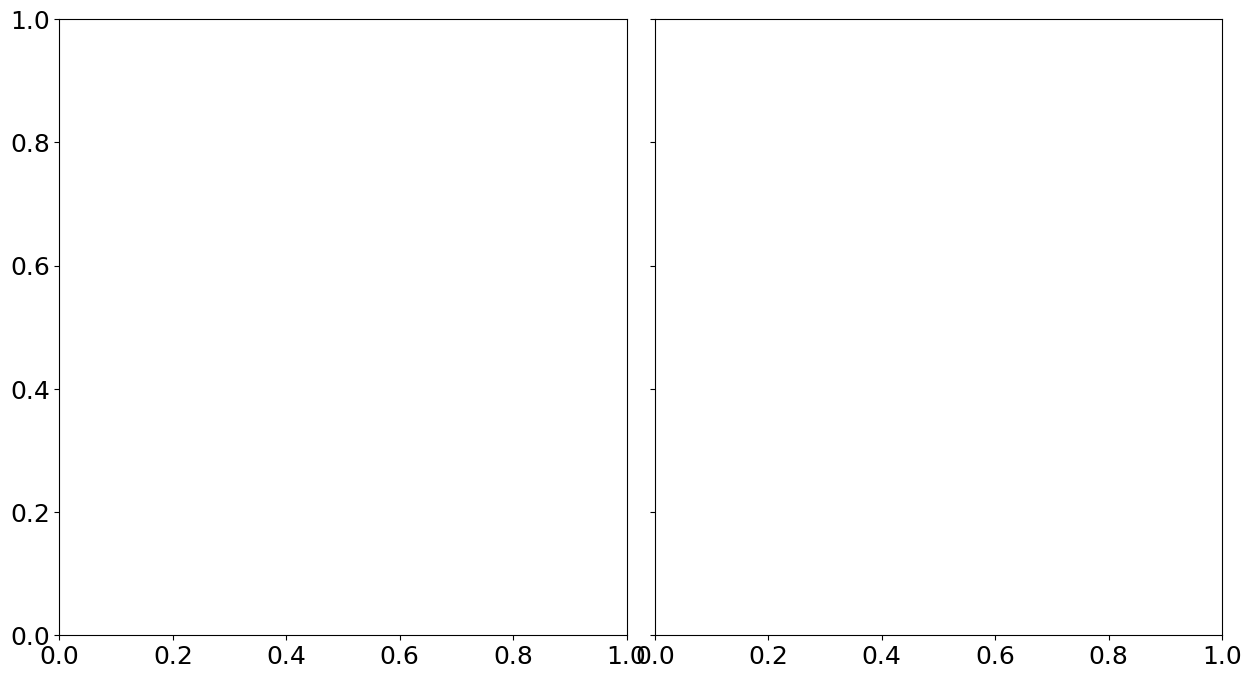

In [21]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,2,figsize=(15,8), sharey=True)
plt.subplots_adjust(wspace=0.05)
ax[0].plot(np.arange(t_steps+1),u, marker='o', label=r'$\vec{u}$', color='red',linewidth=2)
ax[0].plot(np.arange(t_steps+1),l, marker='o', label=r'$\vec{u}$', color='red', linestyle='--',linewidth=2)
p_up = np.cumsum(np.sort(p_feasible))  # sort decending
p_low = np.cumsum(np.sort(p_feasible)[::-1])  # sort ascending
ax[0].plot(np.arange(t_steps)+1,p_up, marker='o', label=r'descending $\vec{p}$', color='blue',linewidth=2)
ax[0].plot(np.arange(t_steps)+1,p_low, marker='o', label=r'ascending $\vec{p}$', color='blue', linestyle='--',linewidth=2)
ax[0].set_xticks(np.arange(t_steps)+1)
ax[0].set_xlabel('time intervals ($k$)')
ax[0].set_ylabel('Energy (kWh)')
ax[0].text(0.75, 0.8,r'$\vec{p}$='+str(p_feasible)+ ' kW', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
ax[0].grid(   )


ax[1].plot(np.arange(t_steps+1),u, marker='o', label=r'$\vec{u}$', color='red',linewidth=2)
ax[1].plot(np.arange(t_steps+1),l, marker='o', label=r'$\vec{u}$', color='red', linestyle='--',linewidth=2)
p_up = np.cumsum(np.sort(p_infeasible))  # sort decending
p_low = np.cumsum(np.sort(p_infeasible)[::-1])  # sort ascending
ax[1].plot(np.arange(t_steps)+1,p_up, marker='o', label=r'descending $\vec{p}$', color='blue',linewidth=2)
ax[1].plot(np.arange(t_steps)+1,p_low, marker='o', label=r'ascending $\vec{p}$', color='blue', linestyle='--',linewidth=2)
ax[1].set_xticks(np.arange(t_steps)+1)
ax[1].set_xlabel('time intervals ($k$)')
ax[1].text(0.75, 0.08,r'$\vec{p}$='+str(p_infeasible)+ ' kW', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

ax[1].grid(   )
#make a single legend for the figure
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=4)

plt.rcParams.update({'font.size': 14})
a = plt.axes([.16, .65, .15, .2])
plt.step(np.arange(t_steps+1)+1,list(p_feasible)+[p_feasible[-1]], label=r'Feasible $\vec{p}$', color='green',where='post', linewidth=2)
plt.xticks(np.arange(t_steps)+1)
plt.text(0.24, 0.8,r'Feasible $\vec{p}$', horizontalalignment='center', verticalalignment='center', transform=a.transAxes)

a = plt.axes([.55, .65, .15, .2])
plt.step(np.arange(t_steps+1)+1,list(p_infeasible)+[p_feasible[-1]], label=r'Feasible $\vec{p}$', color='green',where='post', linewidth=2)
plt.xticks(np.arange(t_steps)+1)
plt.text(0.27, 0.8,r'Infeasible $\vec{p}$', horizontalalignment='center', verticalalignment='center', transform=a.transAxes)
plt.savefig('graphical_test.png', bbox_inches='tight', dpi=300)




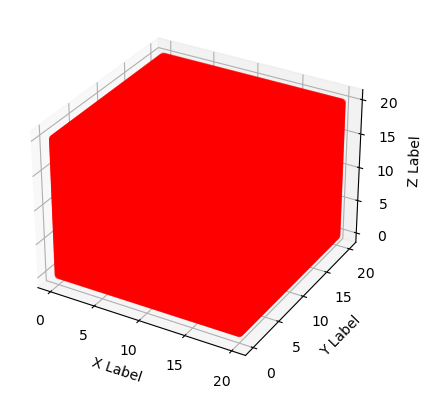

In [ ]:
# plot x+y+z <15
# 0<=x<=20
# 0<=y<=20
# 0<=z<=20
# 15<=x+y+z<=25
# 0<=x+y<=25
# 0<=x+z<=25
# 0<=y+z<=25

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x+y+z <15
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f1 = x + y + z - 15

# 0<=x<=20
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f2 = x

# 0<=y<=20
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f3 = y

# 0<=z<=20

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f4 = z

# 15<=x+y+z<=25
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f5 = x + y + z - 25

# 0<=x+y<=25
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f6 = x + y

# 0<=x+z<=25
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)

z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)
f7 = x + z

# 0<=y+z<=25
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
z = np.linspace(0, 20, 100)
x, y, z = np.meshgrid(x, y, z)

f8 = y + z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()





